In [17]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
stock = '^NSEI'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0
2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0
2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0
2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0
2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0


In [19]:
price = data['Close']
price

Date
2010-01-04     5232.200195
2010-01-05     5277.899902
2010-01-06     5281.799805
2010-01-07     5263.100098
2010-01-08     5244.750000
                  ...     
2023-05-12    18314.800781
2023-05-15    18398.849609
2023-05-16    18286.500000
2023-05-17    18181.750000
2023-05-18    18129.949219
Name: Close, Length: 3281, dtype: float64

<Axes: xlabel='Date'>

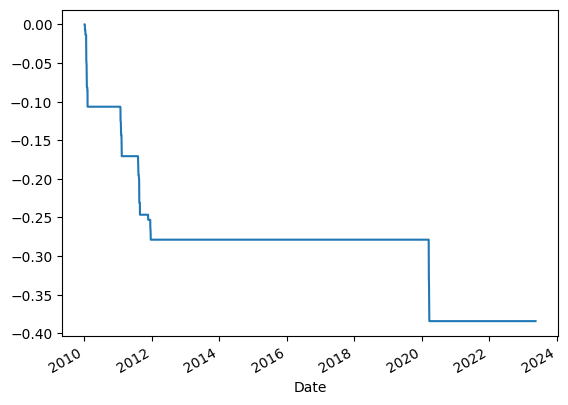

In [20]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [21]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")


Maximum Drawdown for the given period is: -38.43985245274211 %


In [22]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00873432,  0.00073891, ..., -0.00610634,
       -0.00572827, -0.00284905])

In [23]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00873432, 1.00947968, ..., 3.49499242, 3.47497216,
       3.46507178])

In [24]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 346.5071775157329%


In [25]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.246181
2012-12-31    0.276972
2013-12-31    0.067552
2014-12-31    0.313880
2015-12-31   -0.040609
2016-12-31    0.030133
2017-12-31    0.286460
2018-12-31    0.031513
2019-12-31    0.120220
2020-12-31    0.149016
2021-12-31    0.241193
2022-12-31    0.043290
2023-12-31    0.001361
Freq: A-DEC, Name: Close, dtype: float64

In [26]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.008244
2010-03-31    0.066392
2010-04-30    0.005506
2010-05-31   -0.036321
                ...   
2023-01-31   -0.024476
2023-02-28   -0.020281
2023-03-31    0.003225
2023-04-30    0.040626
2023-05-31    0.003595
Freq: M, Name: Close, Length: 161, dtype: float64

In [27]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 9.806151953558171%


In [28]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 5.705706053147852


In [29]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.036321
2010-10-31   -0.002032
2010-11-30   -0.025757
2011-01-31   -0.102470
2011-02-28   -0.031357
                ...   
2022-06-30   -0.048497
2022-09-30   -0.037442
2022-12-31   -0.034814
2023-01-31   -0.024476
2023-02-28   -0.020281
Name: Close, Length: 70, dtype: float64

In [30]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 8.276351226361971
